## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combined= mouse_metadata.merge(study_results, on="Mouse ID", how='left')
# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Checking the number of mice.
n1=New_df["Mouse ID"].count()
n1

In [67]:
num_mice = len(combined['Mouse ID'].unique())
num_mice

249

In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice= combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint']) == True, 'Mouse ID'].unique()
duplicate_mice
#mouse_metadata['Mouse ID'].value_counts()

array(['g989'], dtype=object)

In [69]:

#duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [70]:
# Optional: Get all the data for the duplicate mouse ID. 
combined.loc[combined['Mouse ID'] == 'g989']
#to use loc here too...going through the whole data frame, mouse id = g989...returen all the data for duplicate mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_drug_data=combined.drop_duplicates(subset='Mouse ID', keep= "last")
mouse_drug_data.head()
#this way still retains one record, we need to remove all data related to that mouse id...loc and return the data with a conditional for "id"

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [72]:
# Checking the number of mice in the clean DataFrame.
#No_Mice_df=pd.DataFrame(mouse_drug_data,columns=["Mouse ID"])
No_Mice_df=pd.DataFrame(mouse_drug_data)
len(No_Mice_df)
#use Unique for this part

249

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Data_Volume = combined[["Drug Regimen","Timepoint","Tumor Volume (mm3)"]]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Group_Drug_Reg = Data_Volume.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Group_Drug_Reg_Mean = Group_Drug_Reg.mean()["Tumor Volume (mm3)"]
Group_Drug_Reg_Median = Group_Drug_Reg.median()["Tumor Volume (mm3)"]
Group_Drug_Reg_Error = Group_Drug_Reg.sem()["Tumor Volume (mm3)"]
Group_Drug_Reg_Std = Group_Drug_Reg.std()["Tumor Volume (mm3)"]
Group_Drug_Reg_Var = Group_Drug_Reg.var()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.

#create pd.DataFrame....
df_data= {
    "Mean":  Group_Drug_Reg_Mean,
    "Median":Group_Drug_Reg_Median,
    "SEM" :  Group_Drug_Reg_Error, 
    "Std" :  Group_Drug_Reg_Std,
    "Var" :  Group_Drug_Reg_Var
   
}
new_data_df=pd.DataFrame(df_data)
new_data_df
#groupDrugTimeVol.head()

,Mean,Median,SEM,Std,Var
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
Ketapril,55.235638,53.698743,0.603860,8.279709,68.553577
Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479
Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
Propriva,52.322552,50.854632,0.512884,6.507770,42.351070
Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562


In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#.agg methode 
# summary_df = clean_df.groupby("Drug...").agg({"measure column(dependent variable)(numerical like Timepoint)":[list of functions to apply(like"mean")]})
summary_df = Group_Drug_Reg.agg({'Tumor Volume (mm3)':[np.mean, np.var,np.std, np.median, 'sem']})                                
summary_df

Tumor Volume (mm3)                                          
                           mean        var       std     median       sem
Drug Regimen                                                             
Capomulin             40.675741  24.947764  4.994774  41.557809  0.329346
Ceftamin              52.591172  39.290177  6.268188  51.776157  0.469821
Infubinol             52.884795  43.128684  6.567243  51.820584  0.492236
Ketapril              55.235638  68.553577  8.279709  53.698743  0.603860
Naftisol              54.331565  66.173479  8.134708  52.509285  0.596466
Placebo               54.033581  61.168083  7.821003  52.288934  0.581331
Propriva              52.322552  42.351070  6.507770  50.854632  0.512884
Ramicane              40.216745  23.486704  4.846308  40.673236  0.320955
Stelasyn              54.233149  59.450562  7.710419  52.431737  0.573111
Zoniferol             53.236507  48.533355  6.966589  51.818479  0.516398

## Bar and Pie Charts

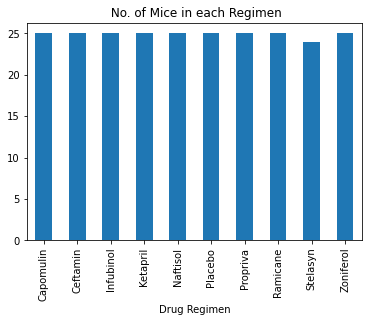

In [141]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#mice_bar = Data_Volume.groupby("Drug Regimen")["Mouse ID"].count()
mice_bar = mouse_drug_data.groupby("Drug Regimen")["Mouse ID"].count()
mice_plot = mice_bar.plot.bar(x="No. of Mice",title = " No. of Mice in each Regimen")

#### Y Lable ?

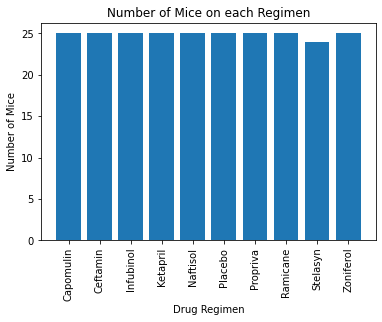

In [117]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_list = mice_bar.reset_index()
plt.bar(drug_list["Drug Regimen"],drug_list["Mouse ID"])
plt.title("Number of Mice on each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.show()

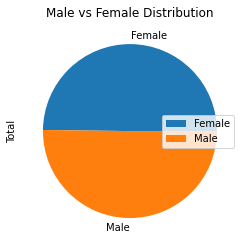

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Female_count = len(mouse_drug_data.loc[mouse_drug_data["Sex"] == "Female"])
Male_count = len(mouse_drug_data.loc[mouse_drug_data["Sex"] == "Male"])
Distribution = pd.DataFrame({
    "Sex":["Female","Male"],
    "Total":[Female_count,Male_count]
    })
Distribution = Distribution.set_index("Sex")
Distribution_plot = Distribution.plot.pie(y = "Total")
Distribution_plot.set_title("Male vs Female Distribution")
plt.legend(loc="right")
Distribution_plot

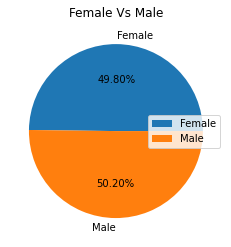

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Distribution["Total"], labels = Distribution.index, autopct = "%1.2f%%")
plt.title("Female Vs Male")
plt.legend(loc="right")
plt.show()


## Quartiles, Outliers and Boxplots

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Four_treat_df= combined.loc[(combined['Drug Regimen'] == 'Capomulin') | (combined['Drug Regimen'] == 'Ramicane')
                            |(combined['Drug Regimen'] == 'Infubinol') | (combined['Drug Regimen'] == 'Ceftamin')]
# Start by getting the last (greatest) timepoint for each mouse
TP_max = Four_treat_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Tumor_vol_df = pd.merge(TP_max, Four_treat_df, on=['Mouse ID','Timepoint'], how='left')
Tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [121]:
# Put treatments into a list for for loop (and later for plot labels)
Treat = list(Tumor_vol_df['Drug Regimen'].unique())
print(Treat)

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol=[]

for drug in Treat:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    Final_Tumor_Vol = Tumor_vol_df.loc[Tumor_vol_df['Drug Regimen'] == drug,'Tumor Volume (mm3)']
    Tumor_vol.append(Final_Tumor_Vol)

    Quantiles = Final_Tumor_Vol.quantile([0.25,0.5,0.75])
    First_quantile = Quantiles[0.25]
    Third_quantile = Quantiles[0.75]
    IQR = Third_quantile - First_quantile

    Lower_Bound = First_quantile - (1.5 * IQR)
    Upper_Bound = Third_quantile + (1.5 * IQR)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    outliers =   Final_Tumor_Vol.loc[(Tumor_vol_df['Tumor Volume (mm3)'] > Upper_Bound) | (Tumor_vol_df['Tumor Volume (mm3)'] < Lower_Bound)]  
        # add subset 

print (f'{drug} potential outliers:{outliers}')  
    # Determine outliers using upper and lower bounds
    

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']
Capomulin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


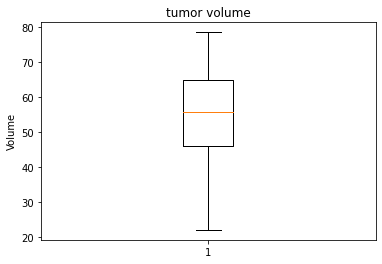

In [122]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volums=mouse_drug_data['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.boxplot(Tumor_Volums)
ax1.set_title('tumor volume')
ax1.set_ylabel('Volume')
plt.show()

## Line and Scatter Plots

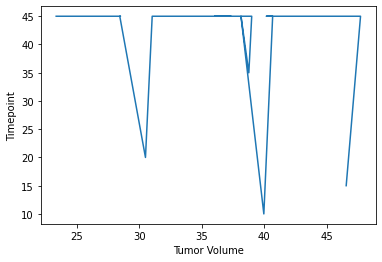

In [123]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
TPoint=mouse_drug_data['Timepoint']
for i in TPoint:
    TV = mouse_drug_data.loc[mouse_drug_data['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)']
    TP = mouse_drug_data.loc[mouse_drug_data['Drug Regimen'] == 'Capomulin','Timepoint']

plt.xlabel("Tumor Volume")
plt.ylabel("Timepoint")
plt.plot(TV, TP)
plt.show()

In [124]:
mouse_drug_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


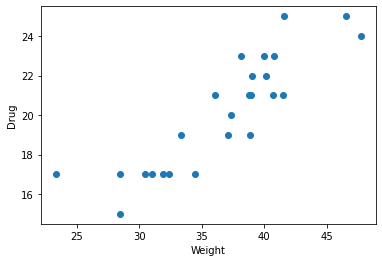

In [125]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

TPoint=mouse_drug_data['Timepoint']
for i in TPoint:
    Mouse_Weight = mouse_drug_data.loc[mouse_drug_data['Drug Regimen'] == 'Capomulin','Weight (g)']
    TV = mouse_drug_data.loc[mouse_drug_data['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)']   

AVE_TV=TV.mean()
 
plt.scatter(TV, Mouse_Weight)
plt.xlabel("Weight")
plt.ylabel("Drug")
plt.show()

### Average ?

## Correlation and Regression

19      31.206107
29      27.705170
39      31.206107
64      31.206107
104     31.206107
124     31.206107
134     31.206107
144     34.707043
164     31.206107
204     36.457512
224     38.207980
244     34.707043
282     34.707043
299     38.207980
309     39.958448
317     38.207980
337     41.708916
340     41.708916
350     38.207980
360     39.958448
370     41.708916
380     38.207980
390     45.209853
440     43.459384
1455    45.209853
Name: Weight (g), dtype: float64
y = 1.75x + 1.45
0.8767060403658116


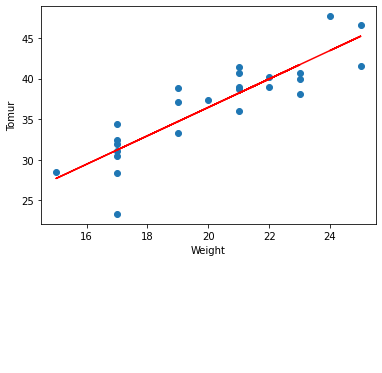

In [126]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Mouse_Weight, TV)
# Get regression values
regress_values = Mouse_Weight * slope + intercept 
print(regress_values)

line_eq = 'y = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Create Plot
plt.scatter(Mouse_Weight, TV)
plt.plot(Mouse_Weight, regress_values, 'r-')
# Label plot and annotate the line equation
plt.xlabel("Weight")
plt.ylabel("Tomur")
plt.annotate(line_eq, (20, 5), fontsize=15, color='red')
# Print r square value
print(rvalue)
# Show plot
plt.show()

###Average??